In [18]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

In [19]:
df = pd.read_csv('Mean_Temp.csv')

In [20]:
df

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95,24.23,18.71,26.06,27.30,21.92
1,1902,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78,24.33,19.70,26.44,27.18,21.49
2,1903,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29,23.80,19.05,25.47,27.17,21.27
3,1904,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84,23.86,18.66,25.84,26.83,21.42
4,1905,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71,23.71,17.58,24.99,27.37,21.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2013,18.88,21.07,24.53,26.97,29.06,28.24,27.50,27.22,26.87,25.63,22.18,19.69,24.82,19.98,26.85,27.46,22.50
113,2014,18.81,20.35,23.34,26.91,28.45,29.42,28.07,27.42,26.61,25.38,22.53,19.50,24.73,19.58,26.24,27.88,22.47
114,2015,19.02,21.23,23.52,26.52,28.82,28.15,28.03,27.64,27.04,25.82,22.95,20.21,24.91,20.12,26.29,27.73,22.99
115,2016,20.92,23.58,26.61,29.56,30.41,29.70,28.18,28.17,27.72,26.81,23.90,21.89,26.45,22.25,28.86,28.44,24.20


In [33]:
df_bin = df[['YEAR','ANNUAL']]
df_bin.columns = ['YEAR', 'ANNUAL']
df_bin.head(118)

,YEAR,ANNUAL
0,1901,24.23
1,1902,24.33
2,1903,23.80
3,1904,23.86
4,1905,23.71
...,...,...
112,2013,24.82
113,2014,24.73
114,2015,24.91
115,2016,26.45


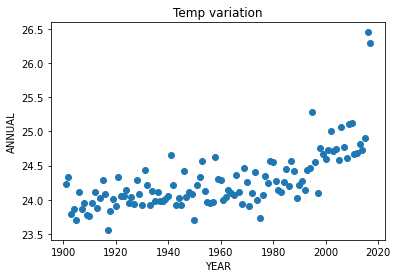

In [34]:
plt.scatter(x = "YEAR" , y = "ANNUAL", data = df_bin)
plt.title('Temp variation')
plt.xlabel('YEAR')
plt.ylabel('ANNUAL')
plt.show()

In [35]:
df_bin.fillna(method = 'ffill', inplace = True)

C:\Users\VRAJ PATEL\Anaconda3.1\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [36]:
X = np.array(df_bin['YEAR']).reshape(-1,1)
y = np.array(df_bin['ANNUAL']).reshape(-1,1)

df_bin.dropna(inplace = True)


C:\Users\VRAJ PATEL\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [38]:
regr = LinearRegression() 
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test)) 

0.4352329196961442


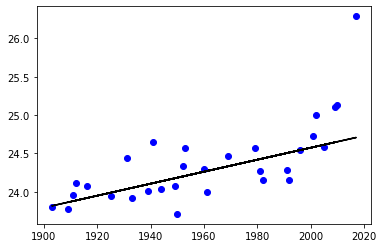

In [39]:
y_pred = regr.predict(X_test) 
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_pred, color ='k') 
  
plt.show() 